# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Limits

We talked about the long term relative frequency idea of probability, and essentially the concept of concentration. A weaker form of concentration is that of a limit.

In this notebook we will explore different concepts of limits, where the first one is running means.

Here we just define a function so that we can easily generate sequences of running means for our $Bernoulli$ process with the unknown $\theta^*$.

#### Preparation: Let's just evaluate the next cell and focus on concepts.

You can see what they are as you need to.

In [123]:
from math import floor
import random
from random import seed as set_random_seed
from math import tan, pi
def likelihoodBernoulli(theta, n, tStatistic):
    '''Bernoulli likelihood function.
    theta in [0,1] is the theta to evaluate the likelihood at.
    n is the number of observations.
    tStatistic is the sum of the n Bernoulli observations.
    return a value for the likelihood of theta given the n observations and tStatistic.'''
    retValue = 0 # default return value
    if (theta >= 0 and theta <= 1): # check on theta
        mpfrTheta = theta
        retValue = (mpfrTheta**tStatistic)*(1-mpfrTheta)**(n-tStatistic)
    return retValue
    
def bernoulliFInverse(u, theta):
    '''A function to evaluate the inverse CDF of a bernoulli.
    
    Param u is the value to evaluate the inverse CDF at.
    Param theta is the distribution parameters.
    Returns inverse CDF under theta evaluated at u'''
    
    return floor(u + theta)
    
def bernoulliSample(n, theta, simSeed=None):
    '''A function to simulate samples from a bernoulli distribution.
    
    Param n is the number of samples to simulate.
    Param theta is the bernoulli distribution parameter.
    Param simSeed is a seed for the random number generator, defaulting to 30.
    Returns a simulated Bernoulli sample as a list.'''
    
    set_random_seed(simSeed)
    us = [random.random() for i in range(n)]
    set_random_seed(None)
    return [bernoulliFInverse(u, theta) for u in us] # use bernoulliFInverse in a list comprehension
    
def bernoulliSampleSecretTheta(n, theta=0.30, simSeed=30):
    '''A function to simulate samples from a bernoulli distribution.
    
    Param n is the number of samples to simulate.
    Param theta is the bernoulli distribution parameter.
    Param simSeed is a seed for the random number generator, defaulting to 30.
    Returns a simulated Bernoulli sample as a list.'''
    
    set_random_seed(simSeed)
    us = [random.random() for i in range(n)]
    set_random_seed(None)
    return [bernoulliFInverse(u, theta) for u in us] # use bernoulliFInverse in a list comprehension

def bernoulliRunningMeans(n, myTheta, mySeed = None):
    '''Function to give a list of n running means from bernoulli with specified theta.
    
    Param n is the number of running means to generate.
    Param myTheta is the theta for the Bernoulli distribution
    Param mySeed is a value for the seed of the random number generator, defaulting to None.'''
     
    sample = bernoulliSample(n, theta=myTheta, simSeed = mySeed)
    from pylab import cumsum # we can import in the middle of code
    csSample = list(cumsum(sample))
    samplesizes = range(1, n+1,1)
    return [(csSample[i])/samplesizes[i] for i in range(n)]
    
#return a plot object for BernoulliLikelihood using the secret theta bernoulli generator
def plotBernoulliLikelihoodSecretTheta(n):
    '''Return a plot object for BernoulliLikelihood using the secret theta bernoulli generator.
    
    Param n is the number of simulated samples to generate and do likelihood plot for.'''
    
    thisBSample = bernoulliSampleSecretTheta(n) # make sample
    tn = sum(thisBSample) # summary statistic
    from pylab import arange
    ths = arange(0,1,0.01) # get some values to plot against
    liks = [likelihoodBernoulli(t,n,tn) for t in ths] # use the likelihood function to generate likelihoods
    redshade = 1*n/1000 # fancy colours
    blueshade = 1 - redshade
    return line(zip(ths, liks), rgbcolor = (redshade, 0, blueshade))
    
def cauchyFInverse(u):
    '''A function to evaluate the inverse CDF of a standard Cauchy distribution.
    
    Param u is the value to evaluate the inverse CDF at.'''
    
    return (tan(pi*(u-0.5)))
    
def cauchySample(n):
    '''A function to simulate samples from a standard Cauchy distribution.
    
    Param n is the number of samples to simulate.'''
    
    us = [random.random() for i in range(n)]
    return [cauchyFInverse(u) for u in us]

def cauchyRunningMeans(n):
    '''Function to give a list of n running means from standardCauchy.
    
    Param n is the number of running means to generate.'''
    
    sample = cauchySample(n)
    from pylab import cumsum
    csSample = list(cumsum(sample))
    samplesizes = range(1, n+1,1)
    return [(csSample[i])/samplesizes[i] for i in range(n)]

def paretoFInverse(u,a=1.5):
    '''A function to evaluate the inverse CDF of a Pareto type II (Lomax) distribution with parameter a and scale 1'''
    return ((1-u)**(-1/a)-1)

def paretoSample(n,a=1.5):
    '''A function to simulate samples from a Pareto type II (Lomax) distribution with parameter a and scale 1.
    
    Param n is the number of samples to simulate.'''
    
    us = [random.random() for i in range(n)]
    return [paretoFInverse(u,a) for u in us]

def paretoRunningMeans(n,a=1.5):
    '''Function to give a list of n running means from a Pareto type II (Lomax) distribution with parameter a and scale 1.
    
    Param n is the number of running means to generate.'''
    
    sample = paretoSample(n,a)
    from pylab import cumsum
    csSample = list(cumsum(sample))
    samplesizes = range(1, n+1,1)
    return [(csSample[i])/samplesizes[i] for i in range(n)]

def twoRunningMeansPlot(nToPlot, iters):
    '''Function to return a graphics array containing plots of running means for Bernoulli and Standard Cauchy.
    
    Param nToPlot is the number of running means to simulate for each iteration.
    Param iters is the number of iterations or sequences of running means or lines on each plot to draw.
    Returns a graphics array object containing both plots with titles.'''
    xvalues = range(1, nToPlot+1,1)
    import matplotlib.pyplot as plt
    fig,axs = plt.subplots(1,2)
    for i in range(iters):
        shade = 0.5*(iters - 1 - i)/iters # to get different colours for the lines
        bRunningMeans = bernoulliSecretThetaRunningMeans(nToPlot)
        cRunningMeans = cauchyRunningMeans(nToPlot)
        bPts = zip(xvalues, bRunningMeans)
        cPts = zip(xvalues, cRunningMeans)
        axs[0].plot(xvalues,bRunningMeans)
        axs[1].plot(xvalues,cRunningMeans)
        #if (i < 1):
        #    p1 = line(bPts, rgbcolor = (shade, 0, 1))
        #    p2 = line(cPts, rgbcolor = (1-shade, 0, shade))
        #    cauchyTitleMax = max(cRunningMeans) # for placement of cauchy title
        #else:
        #    p1 += line(bPts, rgbcolor = (shade, 0, 1))
        #    p2 += line(cPts, rgbcolor = (1-shade, 0, shade))
        #    if max(cRunningMeans) > cauchyTitleMax: cauchyTitleMax = max(cRunningMeans)
    titleText1 = "Bernoulli running means" # make title text
    #t1 = text(titleText1, (nToGenerate/2,1), rgbcolor='blue',fontsize=10) 
    titleText2 = "Standard Cauchy running means" # make title text
    #t2 = text(titleText2, (nToGenerate/2,ceil(cauchyTitleMax)+1), rgbcolor='red',fontsize=10)
    #return graphics_array((p1+t1,p2+t2))

def pmfPointMassPlot(theta):
    '''Returns a pmf plot for a point mass function with parameter theta.'''
    
    ptsize = 10
    linethick = 2
    fudgefactor = 0.07 # to fudge the bottom line drawing
    pmf = points((theta,1), rgbcolor="blue", pointsize=ptsize)
    pmf += line([(theta,0),(theta,1)], rgbcolor="blue", linestyle=':')
    pmf += points((theta,0), rgbcolor = "white", faceted = true, pointsize=ptsize)
    pmf += line([(min(theta-2,-2),0),(theta-0.05,0)], rgbcolor="blue",thickness=linethick)
    pmf += line([(theta+.05,0),(theta+2,0)], rgbcolor="blue",thickness=linethick)
    pmf+= text("Point mass f", (theta,1.1), rgbcolor='blue',fontsize=10)
    pmf.axes_color('grey') 
    return pmf
    
def cdfPointMassPlot(theta):
    '''Returns a cdf plot for a point mass function with parameter theta.'''
    
    ptsize = 10
    linethick = 2
    fudgefactor = 0.07 # to fudge the bottom line drawing
    cdf = line([(min(theta-2,-2),0),(theta-0.05,0)], rgbcolor="blue",thickness=linethick) # padding
    cdf += points((theta,1), rgbcolor="blue", pointsize=ptsize)
    cdf += line([(theta,0),(theta,1)], rgbcolor="blue", linestyle=':')
    cdf += line([(theta,1),(theta+2,1)], rgbcolor="blue", thickness=linethick) # padding
    cdf += points((theta,0), rgbcolor = "white", faceted = true, pointsize=ptsize)
    cdf+= text("Point mass F", (theta,1.1), rgbcolor='blue',fontsize=10)
    cdf.axes_color('grey') 
    return cdf
    
def uniformFInverse(u, theta1, theta2):
    '''A function to evaluate the inverse CDF of a uniform(theta1, theta2) distribution.
    
    u, u should be 0 <= u <= 1, is the value to evaluate the inverse CDF at.
    theta1, theta2, theta2 > theta1, are the uniform distribution parameters.'''
    
    return theta1 + (theta2 - theta1)*u

def uniformSample(n, theta1, theta2):
    '''A function to simulate samples from a uniform distribution.
    
    n > 0 is the number of samples to simulate.
    theta1, theta2 (theta2 > theta1) are the uniform distribution parameters.'''
    
    us = [random() for i in range(n)]
    
    return [uniformFInverse(u, theta1, theta2) for u in us]

def exponentialFInverse(u, lam):
    '''A function to evaluate the inverse CDF of a exponential distribution.
    
    u is the value to evaluate the inverse CDF at.
    lam is the exponential distribution parameter.'''
    
    # log without a base is the natural logarithm
    return (-1.0/lam)*log(1 - u)
    
def exponentialSample(n, lam):
    '''A function to simulate samples from an exponential distribution.
    
    n is the number of samples to simulate.
    lam is the exponential distribution parameter.'''
    
    us = [random() for i in range(n)]
    
    return [exponentialFInverse(u, lam) for u in us]

To get back to our running means of Bernoullin RVs:

In [66]:
def bernoulliSecretThetaRunningMeans(n, mySeed = None):
    #當n=1,2, ...n ，的Xn
    '''Function to give a list of n running means from Bernoulli with unknown theta.
    
    Param n is the number of running means to generate.
    Param mySeed is a value for the seed of the random number generator, defaulting to None
    Note: the unknown theta parameter for the Bernoulli process is defined in bernoulliSampleSecretTheta
    Return a list of n running means.'''
    
    sample = bernoulliSampleSecretTheta(n, simSeed = mySeed)
    from pylab import cumsum # we can import in the middle of code
    csSample = list(cumsum(sample))
    samplesizes = range(1, n+1,1)
    return [(csSample[i])/samplesizes[i] for i in range(n)]

Now we can use this function to look at say 5 different sequences of running means (they will be different, because for each iteration, we will simulate a different sample of $Bernoulli$ observations). 

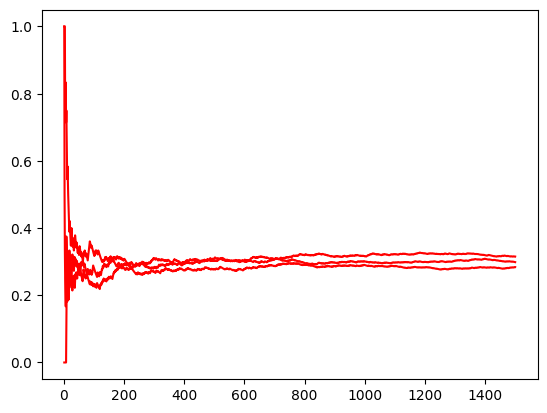

In [72]:
import matplotlib.pyplot as plt
nToGenerate = 1500
iterations = 3
xvalues = range(1, nToGenerate+1,1)
for i in range(iterations):
    redshade = 0.5*(iterations - 1 - i)/iterations # to get different colours for the lines
    bRunningMeans = bernoulliSecretThetaRunningMeans(nToGenerate) #預設 theta=0.30 (p=0.3)
    pts = zip(xvalues,bRunningMeans)
    plt.plot(xvalues,bRunningMeans,color='red')


What we notice is how the different lines **converge** on a sample mean of close to 0.3. 

Is life always this easy?  Unfortunately no.  In the plot below we show the well-behaved running means for the $Bernoulli$ and beside them the running means for simulated  standard $Cauchy$ random variables.  They are all over the place, and each time you re-evaluate the cell you'll get different all-over-the-place behaviour. 

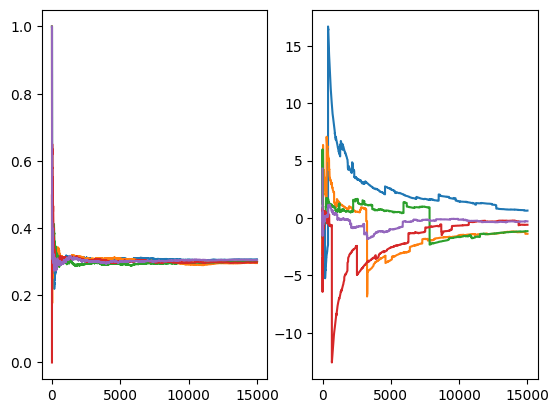

In [79]:
nToGenerate = 15000
iterations = 5
g = twoRunningMeansPlot(nToGenerate, iterations) # uses above function to make plot
#左 Bernoulli  #當n=1,2, ...n ，的Xn
#右 Standard Cauchy #當n=1,2, ...n ，的Xn
# 柯西分佈之一特性就是期望值與變異數均不存在。   MGF 不存在 所以無法收斂

The message here is that although with the Bernoulli process, the sample means converge as the number of observations increases, with the Cauchy they do not. 



## Limits of a Sequence of Real Numbers

A sequence of real numbers $x_1, x_2, x_3, \ldots $ (which we can also write as $\{ x_i\}_{i=1}^\infty$) is said to converge to a limit $a \in \mathbb{R}$,

$$\underset{i \rightarrow \infty}{\lim} x_i = a$$

if for every natural number $m \in \mathbb{N}$, a natural number $N_m \in \mathbb{N}$ exists such that for every $j \geq N_m$, $\left|x_j - a\right| \leq \frac{1}{m}$

What is this saying? $\left|x_j - a\right|$ is measuring the closeness of the $j$th value in the sequence to $a$.  If we pick bigger and bigger $m$, $\frac{1}{m}$ will get smaller and smaller.  The definition of the limit is saying that if $a$ is the limit of the sequence then we can get the sequence to become as close as we want ('arbitrarily close') to $a$, and to stay that close, by going far enough into the sequence ('for every $j \geq N_m$, $\left|x_j - a\right| \leq \frac{1}{m}$')

($\mathbb{N}$, the natural numbers, are just the 'counting numbers' $\{1, 2, 3, \ldots\}$.)

 

Take a trivial example, the sequence $\{x_i\}_{i=1}^\infty = 17, 17, 17, \ldots$

Clearly, $\underset{i \rightarrow \infty}{\lim} x_i = 17$, but let's do this formally:

For every $m \in \mathbb{N}$, take $N_m =1$, then

$\forall$ $j \geq N_m=1, \left|x_j -17\right| = \left|17 - 17\right| = 0 \leq \frac{1}{m}$, as required.

($\forall$ is mathspeak for 'for all' or 'for every')



What about $\{x_i\}_{i=1}^\infty = \displaystyle\frac{1}{1}, \frac{1}{2}, \frac{1}{3}, \ldots$, i.e., $x_i = \frac{1}{i}$?

$\underset{i \rightarrow \infty}{\lim} x_i = \underset{i \rightarrow \infty}{\lim}\frac{1}{i} = 0$

For every $m \in \mathbb{N}$, take $N_m = m$, then $\forall$ $j \geq m$, $\left|x_j - 0\right| \leq \left |\frac{1}{m} - 0\right| = \frac{1}{m}$

## YouTry

Think about $\{x_i\}_{i=1}^\infty = \frac{1}{1^p}, \frac{1}{2^p}, \frac{1}{3^p}, \ldots$ with $p > 0$. The limit $\underset{i \rightarrow \infty}{\lim} \displaystyle\frac{1}{i^p} = 0$, provided $p > 0$.

You can draw the plot of this very easily

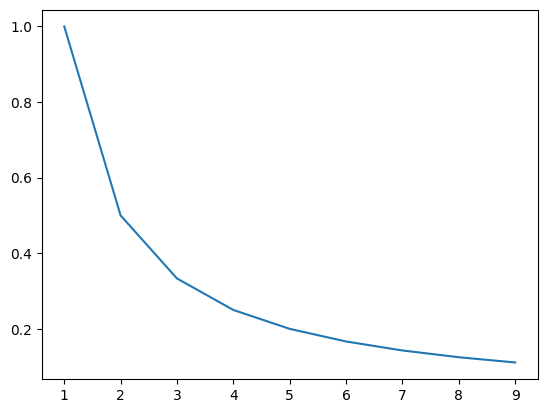

In [80]:
import numpy as np
x = np.arange(1,10)
p=1
y = 1/(x**p)
# make and show plot, note we can use f in the label
plt.plot(x,y)

What about $\{x_i\}_{i=1}^\infty = 1^{\frac{1}{1}}, 2^{\frac{1}{2}}, 3^{\frac{1}{3}}, \ldots$. The limit $\underset{i \rightarrow \infty}{\lim} i^{\frac{1}{i}} = 1$.

This one is not as easy to see intuitively, but again we can plot it

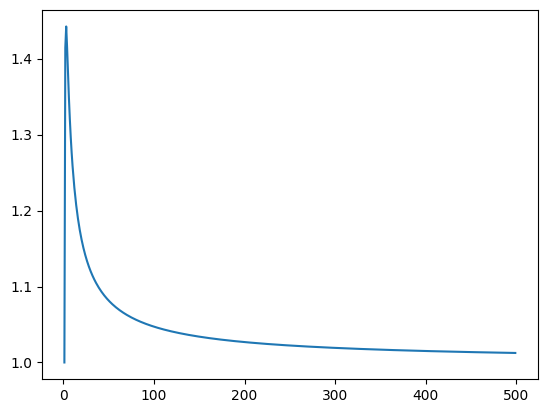

In [88]:
i = np.arange(1,500)
f = i**(1/i)
plt.plot(i,f)

Finally, $\{x_i\}_{i=1}^\infty = p^{\frac{1}{1}}, p^{\frac{1}{2}}, p^{\frac{1}{3}}, \ldots$, with $p > 0$. The limit $\underset{i \rightarrow \infty}{\lim} p^{\frac{1}{i}} = 1$ provided $p > 0$.

You can cut and paste (with suitable adaptations) to try to plot this one as well ...

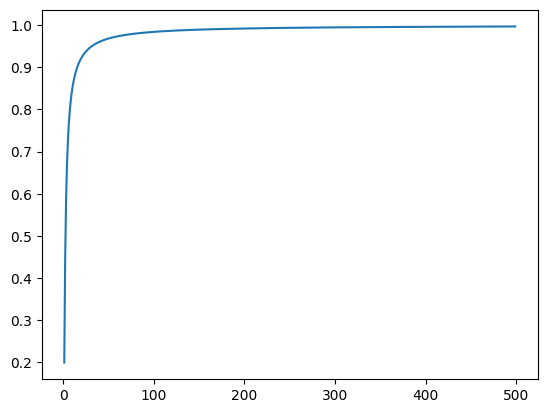

In [86]:
p=0.2
i = np.arange(1,500)
f = p**(1/i)
plt.plot(i,f)

## Limit of a Sequence of Random Variables

We want to be able to say things like $\underset{i \rightarrow \infty}{\lim} X_i = X$ in some sensible way.  $X_i$ are some random variables, $X$ is some 'limiting random variable', but what do we mean by 'limiting random variable'?

To help us, lets introduce a very very simple random variable, one that puts all its mass in one place.  

(0.0, 1.2)

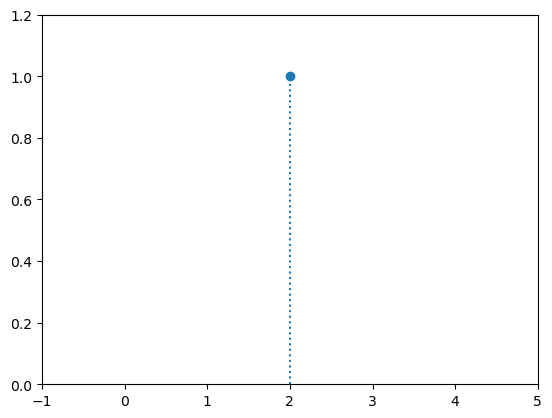

In [40]:
theta = 2.0

plt.scatter(theta,1)
plt.xlim(theta-3,theta+3)
plt.vlines([theta],0,1,linestyle=':')
plt.ylim(0,1.2)

This is known as the $Point\,Mass(\theta)$ random variable, $\theta \in \mathbb(R)$:  the density $f(x)$ is 1 if $x=\theta$ and 0 everywhere else

$$
f(x;\theta) =
\begin{cases}
0 & \text{ if  }  x \neq \theta \\
1 & \text{ if  } x = \theta
\end{cases}
$$

$$
F(x;\theta) =
\begin{cases}
0 & \text{ if  } x < \theta \\
1 & \text{ if  } x \geq \theta
\end{cases}
$$

So, if we had some sequence $\{\theta_i\}_{i=1}^\infty$ and $\underset{i \rightarrow \infty}{\lim} \theta_i = \theta$

and we had a sequence of random variables $X_i \sim Point\,Mass(\theta_i)$, $i = 1, 2, 3, \ldots$

then we could talk about a limiting random variable as $X \sim Point\,Mass(\theta)$:

i.e., we could talk about $\underset{i \rightarrow \infty}{\lim} X_i = X$

(0.0, 1.2)

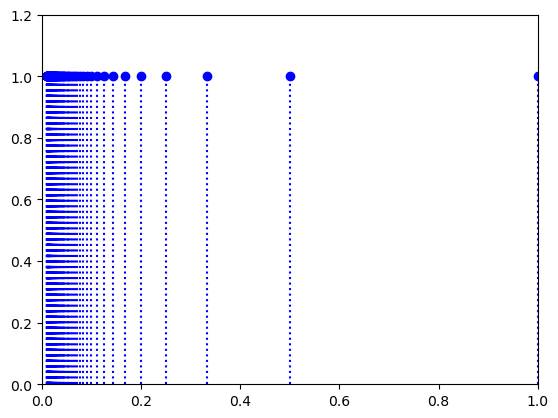

In [47]:
# mock up a picture of a sequence of point mass rvs converging on theta = 0
for  i in range(1,100):
    theta_i = 1/i
    plt.scatter(theta_i,1,color='blue')
    plt.vlines([theta_i],0,1,linestyle=':',color='blue')
    
plt.xlim(0,1)
plt.ylim(0,1.2)

Now, we want to generalise this notion of a limit to other random variables (that are not necessarily $Point\,Mass(\theta_i)$ RVs)

What about one many of you will be familiar with - the 'bell-shaped curve' 

### The $Gaussian(\mu, \sigma^2)$ or $Normal(\mu, \sigma^2)$ RV?

The probability density function (PDF) $f(x)$ is given by

$$
f(x ;\mu, \sigma) = \displaystyle\frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-1}{2\sigma^2}(x-\mu)^2\right)
$$

The two parameters, $\mu \in \mathbb{R} := (-\infty,\infty)$ and $\sigma \in (0,\infty)$, are sometimes referred to as the location and scale parameters.

To see why this is, use the interactive plot below to have a look at what happens to the shape of the density function $f(x)$ when you change $\mu$ or increase or decrease $\sigma$:

In [89]:
from ipywidgets import interact, FloatSlider
@interact
def _(my_mu=FloatSlider(value=0, min=-1,max=1,step=0.1),my_sigma=FloatSlider(value=0.5, min=0.01,max=1,step=0.01)):
    '''Interactive function to plot the normal pdf and ecdf.'''
    
    if my_sigma > 0:
        x_plot = np.linspace(-3,3,200)
        y = (1/(my_sigma*np.sqrt(2.0*np.pi)))*np.exp(-1.0/(2*my_sigma**2)*(x_plot - my_mu)**2)
        plt.plot(x_plot,y)
    else:
        print( "sigma must be greater than 0")

interactive(children=(FloatSlider(value=0.0, description='my_mu', max=1.0, min=-1.0), FloatSlider(value=0.5, d…

Consider the sequence of random variables $X_1, X_2, X_3, \ldots$, where

- $X_1 \sim Normal(0, 1)$
- $X_2 \sim Normal(0, \frac{1}{2})$
- $X_3 \sim Normal(0, \frac{1}{3})$
- $X_4 \sim Normal(0, \frac{1}{4})$
- $\vdots$
- $X_i \sim Normal(0, \frac{1}{i})$
- $\vdots$

We can use the animation below to see how the PDF $f_{i}(x)$ looks as we move through the sequence of $X_i$ (the animation only goes to $i = 25$, $\sigma = 0.04$ but you get the picture ...)

<table style="width:100%">
  <tr>
    <th>Normal curve animation, looping through $ \sigma = \frac{1}{i}$ for $i = 1, \dots, 25$ 
    </th>
  </tr>
<tr>
    <th><img src="images/normalDecreasing.gif" width="300"/></th>
  </tr>
</table>

We can see that the probability mass of $X_i \sim Normal(0, \frac{1}{i})$ increasingly concentrates about 0 as $i \rightarrow \infty$ and $\frac{1}{i} \rightarrow 0$

Does this mean that $\underset{i \rightarrow \infty}{\lim} X_i = Point\,Mass(0)$?

No, because for any $i$, however large, $P(X_i = 0) = 0$ because $X_i$ is a continuous RV (for any continous RV $X$, for any $x \in \mathbb{R}$, $P(X=x) = 0$).

So, we need to refine our notions of convergence when we are dealing with random variables

### Convergence in Distribution

Let $X_1, X_2, \ldots$ be a sequence of random variables and let $X$ be another random variable.  Let $F_i$ denote the distribution function (DF) of $X_i$ and let $F$ denote the distribution function of $X$.

Now, if for any real number $t$ at which $F$ is continuous,

$$\underset{i \rightarrow \infty}{\lim} F_i(t) = F(t)$$

(in the sense of the convergence or limits of functions we talked about earlier)

Then we can say that the sequence or RVs $X_i$, $i = 1, 2, \ldots$ **converges to $X$ in distribution** and write $X_i \rightsquigarrow X$ or $X_i \overset{d}{\rightarrow} X$.

An equivalent way of defining convergence in distribution is to go right back to the meaning of the probabilty space 'under the hood' of a random variable, a random variable $X$ as a mapping from the sample space $\Omega$ to the real line ($X: \Omega \rightarrow \mathbb{R}$), and the sample points or outcomes in the sample space, the $\omega \in \Omega$.  For $\omega \in \Omega$, $X(\omega)$ is the mapping of $\omega$ to the real line $\mathbb{R}$.  We could look at the set of $\omega$ such that $X(\omega) \leq t$, i.e. the set of $\omega$ that map to some value on the real line less than or equal to $t$, $\{\omega: X(\omega) \leq t \}$. 

Saying that for any $t \in \mathbb{R}$, $\underset{i \rightarrow \infty}{\lim} F_i(t) = F(t)$ is the equivalent of saying that for any $t \in \mathbb{R}$, 

$$\underset{i \rightarrow \infty}{\lim} P\left(\{\omega:X_i(\omega) \leq t \}\right) = P\left(\{\omega: X(\omega) \leq t\right)$$

Armed with this, we can go back to our sequence of $Normal$ random variables  $X_1, X_2, X_3, \ldots$, where

- $X_1 \sim Normal(0, 1)$
- $X_2 \sim Normal(0, \frac{1}{2})$
- $X_3 \sim Normal(0, \frac{1}{3})$
- $X_4 \sim Normal(0, \frac{1}{4})$
- $\vdots$
- $X_i \sim Normal(0, \frac{1}{i})$
- $\vdots$

and let $X \sim Point\,Mass(0)$,

and say that the $X_i$ **converge in distribution** to the $x \sim Point\,Mass$ RV $X$,

$$X_i \rightsquigarrow X \qquad \text{or} \qquad X_i \overset{d}{\rightarrow} X$$

What we are saying with convergence in distribution, informally, is that as $i$ increases, we increasingly expect to see the next outcome in a sequence of random experiments becoming better and better modeled by the limiting random variable.  In this case, as $i$ increases, the $Point\,Mass(0)$ is becoming a better and better model for the next outcome of a random experiment with outcomes $\sim Normal(0,\frac{1}{i})$.

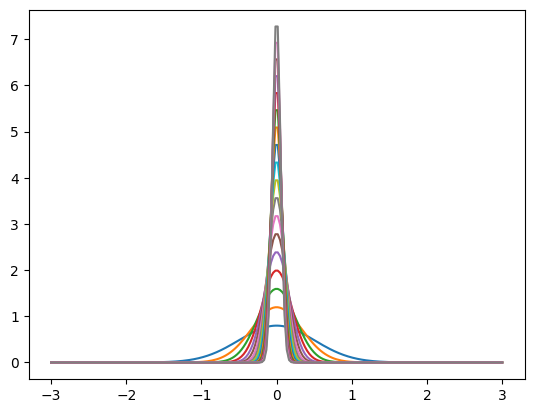

In [91]:
# mock up a picture of a sequence of converging normal distributions

my_mu = 0
x_plot = np.linspace(-3,3,200)

for i in range(2, 20, 1): # just do a few of them
    my_sigma=1/i
    y = (1/(my_sigma*np.sqrt(2.0*np.pi)))*np.exp(-1.0/(2*my_sigma**2)*(x_plot - my_mu)**2)
    plt.plot(x_plot,y)

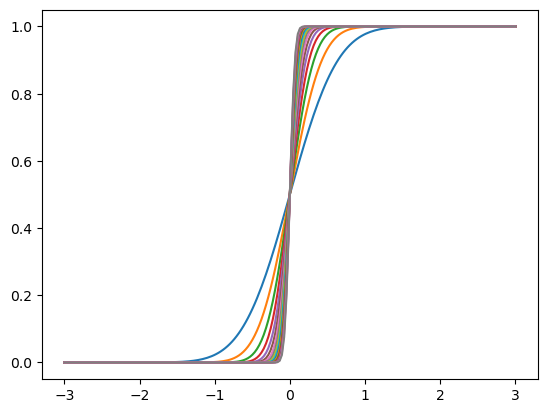

In [55]:
my_mu = 0
x_plot = np.linspace(-3,3,200)
import scipy

for i in range(2, 20, 1): # just do a few of them
    my_sigma=1/i
    y = (1/2)*(1+scipy.special.erf((x_plot-my_mu)/(np.sqrt(2)*my_sigma)))
    plt.plot(x_plot,y)

#### There is an interesting point to note about this convergence: 

We have said that the $X_i \sim Normal(0,\frac{1}{i})$ with distribution functions $F_i$ converge in distribution to $X \sim Point\,Mass(0)$ with distribution function $F$, which means that we must be able to show that for any real number $t$ at which $F$ is continuous,

$$\underset{i \rightarrow \infty}{\lim} F_i(t) = F(t)$$

Note that for any of the $X_i \sim Normal(0, \frac{1}{i})$, $F_i(0) = \frac{1}{2}$, and also note that for $X \sim Point,Mass(0)$, $F(0) = 1$, so clearly $F_i(0) \neq F(0)$.  

What has gone wrong?  

Nothing:  we said that we had to be able to show that $\underset{i \rightarrow \infty}{\lim} F_i(t) = F(t)$ for any $t \in \mathbb{R}$ at which $F$ is continuous, but the $Point\,Mass(0)$ distribution function $F$ is not continous at 0!

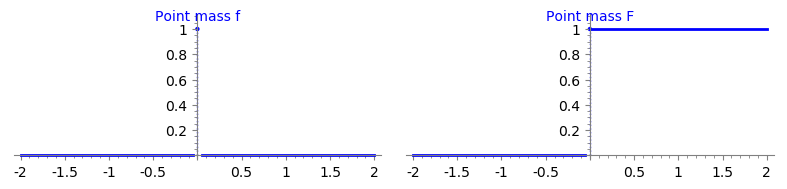

In [15]:
theta = 0.0
# show the plots
show(graphics_array((pmfPointMassPlot(theta),cdfPointMassPlot(theta))),figsize=[8,2]) 

### Convergence in Probability

Let $X_1, X_2, \ldots$ be a sequence of random variables and let $X$ be another random variable.  Let $F_i$ denote the distribution function (DF) of $X_i$ and let $F$ denote the distribution function of $ X $.

Now, if for any real number $\varepsilon > 0$,

$$\underset{i \rightarrow \infty}{\lim} P\left(|X_i - X| > \varepsilon\right) = 0$$

Then we can say that the sequence $X_i$, $i = 1, 2, \ldots$ **converges to $X$ in probability** and write $X_i \overset{P}{\rightarrow} X$.

Or, going back again to the probability space 'under the hood' of a random variable,  we could look the way the $X_i$ maps each outcome $\omega \in \Omega$, $X_i(\omega)$, which is some point on the real line, and compare this to mapping $X(\omega)$.   

Saying that for any $\varepsilon \in \mathbb{R}$, $\underset{i \rightarrow \infty}{\lim} P\left(|X_i - X| > \varepsilon\right) = 0$ is the equivalent of saying that for any $\varepsilon \in \mathbb{R}$, 

$$\underset{i \rightarrow \infty}{\lim} P\left(\{\omega:|X_i(\omega) - X(\omega)| > \varepsilon \}\right) = 0$$

Informally, we are saying $X$ is a limit in probabilty if, by going far enough into the sequence $X_i$, we can ensure that the mappings $X_i(\omega)$ and $X(\omega)$ will be arbitrarily close to each other on the real line for all $\omega \in \Omega$.

**Note** that convergence in distribution is implied by convergence in probability: convergence in distribution is the weakest form of convergence; any sequence of RV's that converges in probability to some RV $X$ also converges in distribution to $X$ (but not necessarily vice versa).  

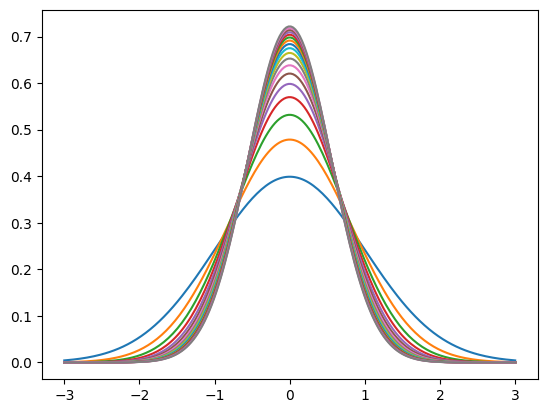

In [92]:
# mock up a picture of a sequence of converging normal distributions
my_mu = 0
x_plot = np.linspace(-3,3,200)

for i in range(2, 20, 1): # just do a few of them
    my_sigma=1/i+0.5
    y = (1/(my_sigma*np.sqrt(2.0*np.pi)))*np.exp(-1.0/(2*my_sigma**2)*(x_plot - my_mu)**2)
    plt.plot(x_plot,y)

For our sequence of $Normal$ random variables  $X_1, X_2, X_3, \ldots$, where

- $X_1 \sim Normal(0, 1)$
- $X_2 \sim Normal(0, \frac{1}{2})$
- $X_3 \sim Normal(0, \frac{1}{3})$
- $X_4 \sim Normal(0, \frac{1}{4})$
- $\vdots$
- $X_i \sim Normal(0, \frac{1}{i})$
- $\vdots$

and $X \sim Point\,Mass(0)$,

It can be shown that the $X_i$ converge in probability to $X \sim Point\,Mass(0)$ RV $X$,

$$X_i \overset{P}{\rightarrow} X$$

Since we are going to be using Markovs inequality later, we might as well take a look at it here and prove it.

#### Markov's inequality

This is our first concentration inequality.

Let $x$ be a nonnegative random variable. Then for $a > 0$,
$$
    P(X \geq a) \leq \frac{E[X]}{a}
$$

#### Proof

Let us begin by assuming that $X$ is a continuous random variable and let us write
$$
    P(X \geq a) = \int_{a}^\infty f(x) dx = \frac{1}{a} \int_{a}^\infty a f(x) dx \leq \frac{1}{a} \int_{a}^\infty x f(x) dx \leq \frac{1}{a} E[X] \enspace.
$$

#### Convergence in probability of our sequence
Lets now use it! Remember we need to prove

$$\underset{i \rightarrow \infty}{\lim} P\left(|X_i - X| > \varepsilon\right) = 0$$

but $X = 0$ since its a $Point\,Mass(0)$ r.v. so by Markov's inequality and by further assuming that $X$ has finite variance, we get:

$$
    P\left(|X_i - X| \geq \varepsilon\right) = P\left(|X_i - X|^2 \geq \varepsilon^2 \right) \leq \frac{E[|X_i-X|^2]}{\varepsilon^2} = \text{Var}[X_i]\frac{1}{\varepsilon^2} \leq \frac{1}{i}\frac{1}{\varepsilon^2} \enspace.
$$

In [59]:
from Utils import showURL
showURL('https://en.wikipedia.org/wiki/Convergence_of_random_variables') # also check out 'almost sure convergence'

## Some Basic Limit Laws in Statistics

Intuition behind Law of Large Numbers and Central Limit Theorem

Take a look at the Khan academy videos on the Law of Large Numbers and the Central Limit Theorem. This will give you a working idea of these theorems.  In the sequel, we will strive for a deeper understanding of these theorems on the basis of the two notions of convergence of sequences of random variables we just saw.
   

### Weak Law of Large Numbers

Remember that a statistic is a random variable, so a sample mean is a random variable. If we are given a sequence of independent and identically distributed RVs, $X_1,X_2,\ldots \overset{IID}{\sim} X_1$, then we can also think of a sequence of random variables $\overline{X}_1, \overline{X}_2, \ldots, \overline{X}_n, \ldots$ ($n$ being the sample size). 

Since $X_1, X_2, \ldots$ are $IID$, they all have the same expection, say $E(X_1)$ by convention.

If $E(X_1)$ exists, then the sample mean $\overline{X}_n$ converges in probability to $E(X_1)$ (i.e., to the expectatation of any one of the individual RVs):

$$
\text{If} \quad X_1,X_2,\ldots \overset{IID}{\sim} X_1 \ \text{and if } \ E(X_1) \ \text{exists, then } \ \overline{X}_n \overset{P}{\rightarrow} E(X_1) \ .
$$

Going back to our definition of convergence in probability, we see that this means that for any real number $\varepsilon > 0$, $\underset{n \rightarrow \infty}{\lim} P\left(|\overline{X}_n - E(X_1)| > \varepsilon\right) = 0$

Informally, this means that means that, by taking larger and larger samples we can make the probability that the average of the observations is more than $\varepsilon$ away from the expected value get smaller and smaller.

Proof of this is beyond the scope of this course, but we have already seen it in action when we looked at the $Bernoulli$ running means.  Have another look, this time with only one sequence of running means.  You can increase $n$, the sample size, and change $\theta$.  Note that the seed for the random number generator is also under your control.   This means that you can get replicable samples:  in particular, in this interact, when you increase the sample size it looks as though you are just adding more to an existing sample rather than starting from scratch with a new one.  

In [93]:
#bernoulli
from ipywidgets import IntSlider
@interact
def _(nToGenerate=IntSlider(value=1,min=50,max=1500,step=100),rSeed=IntSlider(value=1,min=0,max=20,step=1)):
    import matplotlib.pyplot as plt
    xvalues = range(1, nToGenerate+1,1)
    bRunningMeans = bernoulliSecretThetaRunningMeans(nToGenerate,mySeed=rSeed)#theta=0.3
    plt.plot(xvalues,bRunningMeans,color='red')
    plt.ylim(0,1)

interactive(children=(IntSlider(value=50, description='nToGenerate', max=1500, min=50, step=100), IntSlider(va…

In [94]:
from ipywidgets import IntSlider
@interact
def _(nToGenerate=IntSlider(value=1,min=50,max=1500,step=100),rSeed=IntSlider(value=1,min=0,max=20,step=1)):
    import matplotlib.pyplot as plt
    xvalues = range(1, nToGenerate+1,1)
    random.seed(rSeed)
    bRunningMeans = paretoRunningMeans(nToGenerate)
    plt.plot(xvalues,bRunningMeans,color='red')
    plt.ylim(0,3)

interactive(children=(IntSlider(value=50, description='nToGenerate', max=1500, min=50, step=100), IntSlider(va…

## Central Limit Theorem

You have probably all heard of the Central Limit Theorem before, but now we can relate it to our definition of convergence in distribution.  

Let $X_1,X_2,\ldots \overset{IID}{\sim} X_1$ and suppose $E(X_1)$ and $V(X_1)$ both exist,

then

$$
\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i  \overset{d}{\rightarrow} X \sim Normal \left(E(X_1),\frac{V(X_1)}{n} \right)
$$

And remember $Z \sim Normal(0,1)$?

Consider $Z_n := \displaystyle\frac{\overline{X}_n-E(\overline{X}_n)}{\sqrt{V(\overline{X}_n)}} = \displaystyle\frac{\sqrt{n} \left( \overline{X}_n -E(X_1) \right)}{\sqrt{V(X_1)}}$

If $\overline{X}_n = \displaystyle\frac{1}{n} \displaystyle\sum_{i=1}^n X_i  \overset{d}{\rightarrow}  X \sim Normal \left(E(X_1),\frac{V(X_1)}{n} \right)$, then $\overline{X}_n -E(X_1)  \overset{d}{\rightarrow}  X-E(X_1) \sim Normal \left( 0,\frac{V(X_1)}{n} \right)$

and $\sqrt{n} \left( \overline{X}_n -E(X_1) \right)  \overset{d}{\rightarrow}  \sqrt{n} \left( X-E(X_1) \right) \sim Normal \left( 0,V(X_1) \right)$

so $Z_n := \displaystyle \frac{\overline{X}_n-E(\overline{X}_n)}{\sqrt{V(\overline{X}_n)}} = \displaystyle\frac{\sqrt{n} \left( \overline{X}_n -E(X_1) \right)}{\sqrt{V(X_1)}}  \overset{d}{\rightarrow}  Z \sim Normal \left( 0,1 \right)$

Thus, for sufficiently large $n$ (say $n>30$), probability statements about $\overline{X}_n$ can be approximated using the $Normal$ distribution. 

The beauty of the CLT, as you have probably seen from other courses, is that $\overline{X}_n \overset{d}{\rightarrow} Normal \left( E(X_1), \frac{V(X_1)}{n} \right)$ does not require the $X_i$ to be normally distributed. 

We can try this with our $Bernoulli$ RV generator.  First, a small number of samples:

In [117]:
from ipywidgets import interact, IntSlider
from Utils import discrete_histogram
import numpy as np
@interact 
def concentration(n=IntSlider(1,1,50,5)):
    import matplotlib.pyplot as plt
    X = np.random.randint(0,2,size=(n,10000))
    means = np.mean(X,axis=0)
    variance = np.var(X,axis=0)
    xn_mean=np.mean(means)
    xn_variance=np.var(means)
    print("P(mean > mu + 0.3 ) = %.5f <= Chebychev %.5f" % (np.mean(means > 0.5+0.3),(1/4)/(0.3**2*n)))
    
    real_expected_x1=(0-0.5)*0.5+(1-0.5)*0.5
    real_var_x1=(0-0.5)**2*0.5+(1-0.5)**2*0.5
    print("real expected(x1):",real_expected_x1)
    print("real var(x1):",real_var_x1)
    print("simulation var(x1):", variance)
    print("xn_mean: %.5f, xn_variance: %.5f, real var(x1)/n: %.5f" % (xn_mean,xn_variance,real_var_x1/n))
    discrete_histogram(means,normed=True)
    plt.xlim(0,1)

interactive(children=(IntSlider(value=1, description='n', max=50, min=1, step=5), Output()), _dom_classes=('wi…

Increase the sample size and the numbe rof bins in the above interact and see if the histograms of the sample means are looking more and more normal as the CLT would have us believe.

But although the $X_i$ do not have to be $\sim Normal$ for $\overline{X}_n = \overset{d}{\rightarrow} X \sim Normal\left(E(X_1),\frac{V(X_1)}{n} \right)$, remember that we said "Let $X_1,X_2,\ldots \overset{IID}{\sim} X_1$ and suppose $E(X_1)$ and $V(X_1)$ both exist", then,

$$
\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i  \overset{d}{\rightarrow} X \sim Normal \left(E(X_1),\frac{V(X_1)}{n} \right)
$$

This is where is all goes horribly wrong for the standard $Cauchy$ distribution (any $Cauchy$ distribution in fact):  neither the expectation nor the variance exist for this distribution.  The Central Limit Theorem cannot be applied here.  In fact, if $X_1,X_2,\ldots \overset{IID}{\sim}$ standard $Cauchy$, then $\overline{X}_n = \displaystyle \frac{1}{n} \sum_{i=1}^n X_i  \sim$ standard $Cauchy$.

## YouTry

Try looking at samples from two other RVs where the expectation and variance do exist, the $Uniform$ and the $Exponential$:

### Uniform distribution

In [151]:

from ipywidgets import interact, IntSlider
from Utils import discrete_histogram
import numpy as np
@interact 
def concentration(n=IntSlider(1,1,50,5)):
    import matplotlib.pyplot as plt
    X = np.random.uniform(0.0, 1.0, size=(n,10000))
    means = np.mean(X,axis=0)
    variance = np.var(X,axis=0)
    xn_mean=np.mean(means)
    xn_variance=np.var(means)
    print("P(mean > mu + 0.3 ) = %.5f <= Chebychev %.5f" % (np.mean(means > 0.5+0.3),(1/4)/(0.3**2*n)))
    
    real_expected_x1=(1-0)/2
    real_var_x1=(1-0)**2/12
    print("real expected(x1):",real_expected_x1)
    print("real var(x1):",real_var_x1)
    print("simulation var(x1):", variance)
    print("xn_mean: %.5f, xn_variance: %.5f, real var(x1)/n: %.5f" % (xn_mean,xn_variance,real_var_x1/n))
    _=plt.hist(means, bins='auto')

interactive(children=(IntSlider(value=1, description='n', max=50, min=1, step=5), Output()), _dom_classes=('wi…

### Exponential distribution

In [153]:
#Uniform distribution
from ipywidgets import interact, IntSlider
from Utils import discrete_histogram
import numpy as np
@interact 
def concentration(n=IntSlider(1,1,50,5)):
    import matplotlib.pyplot as plt
    X = np.random.exponential(scale=4, size=(n,10000))
    means = np.mean(X,axis=0)
    variance = np.var(X,axis=0)
    xn_mean=np.mean(means)
    xn_variance=np.var(means)
    print("P(mean > mu + 0.3 ) = %.5f <= Chebychev %.5f" % (np.mean(means > 0.5+0.3),(1/4)/(0.3**2*n)))
    
    real_expected_x1=4
    real_var_x1=4**2
    print("real expected(x1):",real_expected_x1)
    print("real var(x1):",real_var_x1)
    print("simulation var(x1):", variance)
    print("xn_mean: %.5f, xn_variance: %.5f, real var(x1)/n: %.5f" % (xn_mean,xn_variance,real_var_x1/n))
    _=plt.hist(means, bins='auto')

interactive(children=(IntSlider(value=1, description='n', max=50, min=1, step=5), Output()), _dom_classes=('wi…